## 1. 环境设置和数据加载

In [13]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 设置绘图样式
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ 库导入完成")

✅ 库导入完成


In [14]:
# 导入自定义模块
import sys
sys.path.append('..')

from src.data_loader import CryptoDataLoader
from src.feature_engineering import FeatureEngineer
from src.model import CryptoPredictor, EnsemblePredictor

print("✅ 自定义模块导入完成")

✅ 自定义模块导入完成


In [15]:
# 加载数据
loader = CryptoDataLoader(data_dir="../data")
train_df, test_df = loader.load_data()

print(f"训练数据: {train_df.shape}")
print(f"测试数据: {test_df.shape}")

📊 加载数据...
✅ 训练数据: (484202, 7)
✅ 测试数据: (2881, 6)

📋 训练数据列: ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Target']
训练数据: (484202, 7)
测试数据: (2881, 6)
✅ 训练数据: (484202, 7)
✅ 测试数据: (2881, 6)

📋 训练数据列: ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Target']
训练数据: (484202, 7)
测试数据: (2881, 6)


## 2. 数据探索性分析 (EDA)

In [16]:
# 查看数据基本信息
print("训练数据信息:")
train_df.info()

print("\n前5行:")
display(train_df.head())

训练数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484202 entries, 0 to 484201
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  484202 non-null  object 
 1   Open       484202 non-null  float64
 2   High       484202 non-null  float64
 3   Low        484202 non-null  float64
 4   Close      484202 non-null  float64
 5   Volume     484202 non-null  float64
 6   Target     484202 non-null  float64
dtypes: float64(6), object(1)
memory usage: 25.9+ MB

前5行:


,Timestamp,Open,High,Low,Close,Volume,Target
0,2012-01-01 10:00:00,4.58,4.58,4.58,4.58,0.0,0.0
1,2012-01-01 10:15:00,4.58,4.58,4.58,4.58,0.0,0.0
2,2012-01-01 10:30:00,4.58,4.58,4.58,4.58,0.0,0.0
3,2012-01-01 10:45:00,4.58,4.58,4.58,4.58,0.0,0.0
4,2012-01-01 11:00:00,4.58,4.58,4.58,4.58,0.0,0.0


In [17]:
# 统计描述
train_df.describe()

,Open,High,Low,Close,Volume,Target
count,484202.000000,484202.000000,484202.000000,484202.000000,484202.000000,484202.000000
mean,20658.013160,20697.816112,20616.371899,20658.196823,77.300625,0.000021
std,29232.444299,29278.365259,29185.082799,29232.673493,176.809316,0.005454
min,4.140000,4.140000,3.800000,4.140000,0.000000,-0.276799
25%,439.990000,441.000000,438.430000,440.000000,7.580896,-0.001275
50%,7183.130000,7199.000000,7165.760000,7182.745000,26.952946,0.000000
75%,30169.955000,30214.720000,30115.120000,30169.750000,77.183091,0.001384
max,126094.000000,126272.000000,125675.000000,126111.000000,11166.690839,0.598299


In [18]:
# 检查缺失值
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    print("缺失值统计:")
    print(missing)
    
    # 可视化缺失值
    plt.figure(figsize=(10, 6))
    missing.plot(kind='barh')
    plt.title('缺失值统计')
    plt.xlabel('缺失数量')
    plt.show()
else:
    print("✅ 没有缺失值")

✅ 没有缺失值


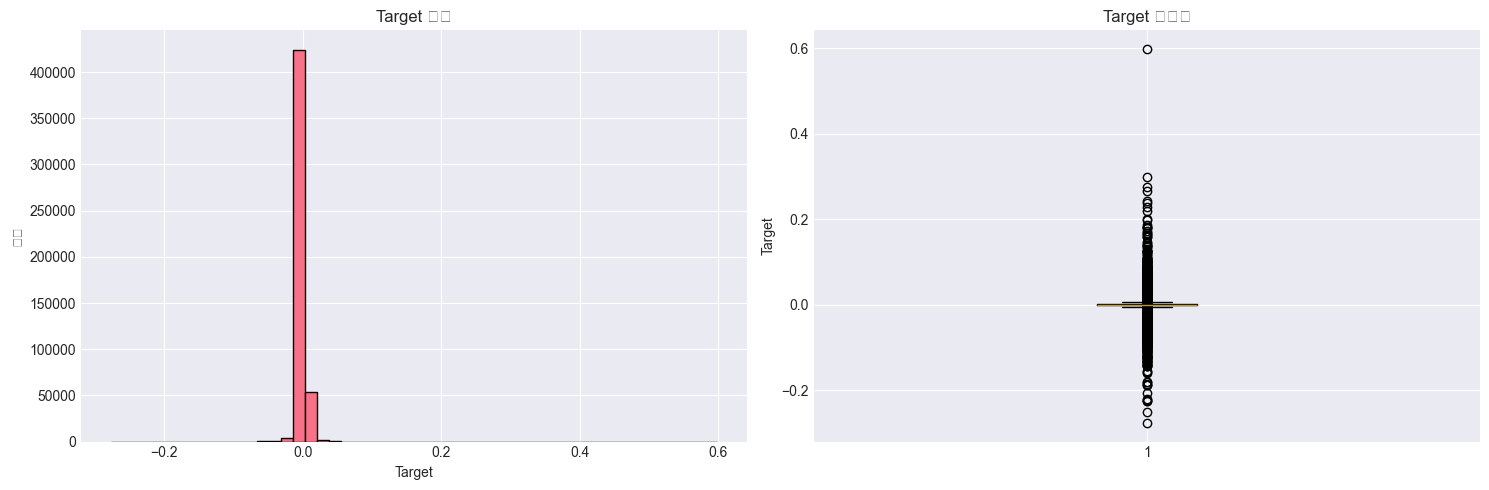


Target 统计:
count    484202.000000
mean          0.000021
std           0.005454
min          -0.276799
25%          -0.001275
50%           0.000000
75%           0.001384
max           0.598299
Name: Target, dtype: float64


In [19]:
# 目标变量分布
target_col = 'Target'  # 根据数据分析，目标列是 'Target'

if target_col in train_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # 分布图
    axes[0].hist(train_df[target_col].dropna(), bins=50, edgecolor='black')
    axes[0].set_title(f'{target_col} 分布')
    axes[0].set_xlabel(target_col)
    axes[0].set_ylabel('频数')
    
    # 箱线图
    axes[1].boxplot(train_df[target_col].dropna())
    axes[1].set_title(f'{target_col} 箱线图')
    axes[1].set_ylabel(target_col)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{target_col} 统计:")
    print(train_df[target_col].describe())
else:
    print(f"⚠️ 未找到目标列 '{target_col}'")

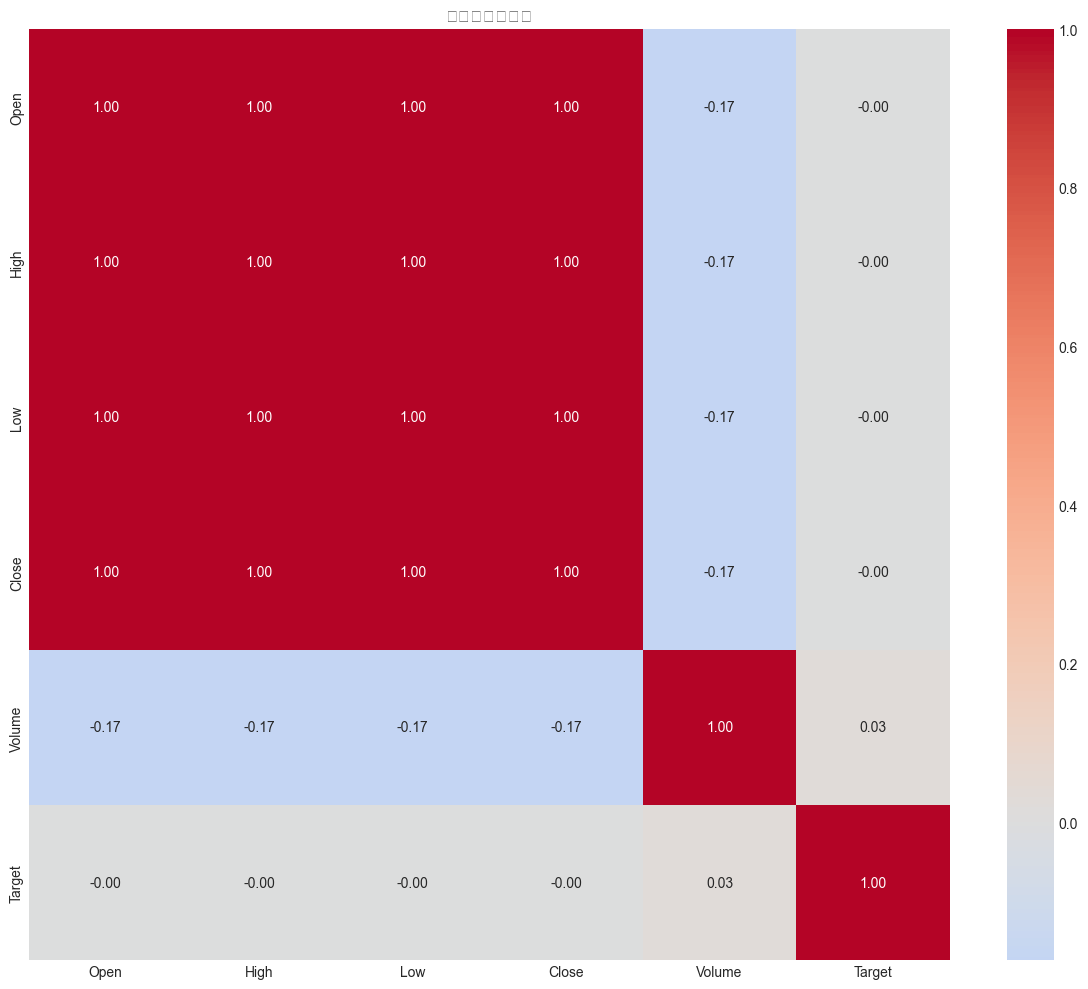

In [20]:
# 相关性分析
numeric_cols = train_df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation = train_df[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('特征相关性热图')
    plt.tight_layout()
    plt.show()

## 3. 特征工程

In [21]:
# 创建特征
fe = FeatureEngineer()

# 对于训练集，使用目标列
train_df_featured = fe.create_all_features(train_df, target_col='Target')

# 对于测试集，使用Close作为价格列进行技术指标计算
test_df_featured = fe.create_all_features(test_df, target_col='Close')

print(f"原始特征数: {train_df.shape[1]}")
print(f"特征工程后: {train_df_featured.shape[1]}")
print(f"新增特征数: {train_df_featured.shape[1] - train_df.shape[1]}")

🔧 开始特征工程...
目标列: Target
时间列: Timestamp
⚠️  删除了 29468 行含缺失值的数据
✅ 特征工程完成，最终特征数: 40
🔧 开始特征工程...
目标列: Close
时间列: Timestamp
⚠️  删除了 30 行含缺失值的数据
✅ 特征工程完成，最终特征数: 39
原始特征数: 7
特征工程后: 40
新增特征数: 33
⚠️  删除了 29468 行含缺失值的数据
✅ 特征工程完成，最终特征数: 40
🔧 开始特征工程...
目标列: Close
时间列: Timestamp
⚠️  删除了 30 行含缺失值的数据
✅ 特征工程完成，最终特征数: 39
原始特征数: 7
特征工程后: 40
新增特征数: 33


In [22]:
# 查看新创建的特征
new_features = [col for col in train_df_featured.columns if col not in train_df.columns]
print(f"新特征列表 ({len(new_features)} 个):")
for i, feat in enumerate(new_features, 1):
    print(f"{i}. {feat}")

新特征列表 (33 个):
1. Target_lag_1
2. Target_lag_2
3. Target_lag_3
4. Target_lag_7
5. Target_lag_14
6. Target_lag_30
7. Target_ma_7
8. Target_std_7
9. Target_max_7
10. Target_min_7
11. Target_ma_14
12. Target_std_14
13. Target_max_14
14. Target_min_14
15. Target_ma_30
16. Target_std_30
17. Target_max_30
18. Target_min_30
19. rsi
20. macd
21. macd_signal
22. bb_middle
23. bb_std
24. bb_upper
25. bb_lower
26. price_change
27. price_change_7d
28. year
29. month
30. day
31. dayofweek
32. hour
33. is_weekend


## 4. 模型训练

In [23]:
from sklearn.model_selection import train_test_split

# 准备数据
predictor = CryptoPredictor(model_type='xgboost')

# 排除ID和时间列
exclude_cols = ['Timestamp']
id_cols = [col for col in train_df_featured.columns if 'id' in col.lower()]
exclude_cols.extend(id_cols)

# 准备训练数据
X, y = predictor.prepare_features(train_df_featured, target_col='Target', exclude_cols=exclude_cols)

# 清理数据：替换无穷大和NaN值
print("清理数据...")
print(f"无穷大值数量: {np.isinf(X).sum().sum()}")
print(f"NaN值数量: {np.isnan(X).sum().sum()}")

# 替换无穷大值为NaN
X = X.replace([np.inf, -np.inf], np.nan)

# 用列均值填充NaN
X = X.fillna(X.mean())

# 如果还有NaN（某列全是NaN），用0填充
X = X.fillna(0)

print(f"清理后 - 无穷大值: {np.isinf(X).sum().sum()}, NaN值: {np.isnan(X).sum().sum()}")

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n训练集: {X_train.shape}")
print(f"验证集: {X_val.shape}")
print(f"特征数量: {X_train.shape[1]}")

清理数据...
无穷大值数量: 26188
NaN值数量: 0
清理后 - 无穷大值: 0, NaN值: 0

训练集: (363787, 37)
验证集: (90947, 37)
特征数量: 37
清理后 - 无穷大值: 0, NaN值: 0

训练集: (363787, 37)
验证集: (90947, 37)
特征数量: 37


In [24]:
# 训练 XGBoost 模型
xgb_predictor = CryptoPredictor(model_type='xgboost')
xgb_predictor.feature_names = predictor.feature_names
xgb_metrics = xgb_predictor.train(X_train, y_train, X_val, y_val)


🚀 开始训练 xgboost 模型...
训练集大小: (363787, 37)
✅ 模型训练完成
✅ 模型训练完成

📊 训练集 评估结果:
  RMSE: 0.0004
  MAE:  0.0003
  R²:   0.9951

📊 验证集 评估结果:
  RMSE: 0.0014
  MAE:  0.0003
  R²:   0.9364

📊 训练集 评估结果:
  RMSE: 0.0004
  MAE:  0.0003
  R²:   0.9951

📊 验证集 评估结果:
  RMSE: 0.0014
  MAE:  0.0003
  R²:   0.9364



🔝 Top 20 重要特征:
            feature  importance
24             macd    0.154221
12     Target_std_7    0.108846
23              rsi    0.091612
14     Target_min_7    0.077091
13     Target_max_7    0.061220
9     Target_lag_14    0.058574
18    Target_min_14    0.047872
20    Target_std_30    0.031107
26           bb_std    0.028940
5      Target_lag_1    0.026669
25      macd_signal    0.024468
22    Target_min_30    0.023448
29     price_change    0.023288
16    Target_std_14    0.021852
11      Target_ma_7    0.021100
17    Target_max_14    0.017757
21    Target_max_30    0.016446
30  price_change_7d    0.013377
2               Low    0.012942
10    Target_lag_30    0.011492


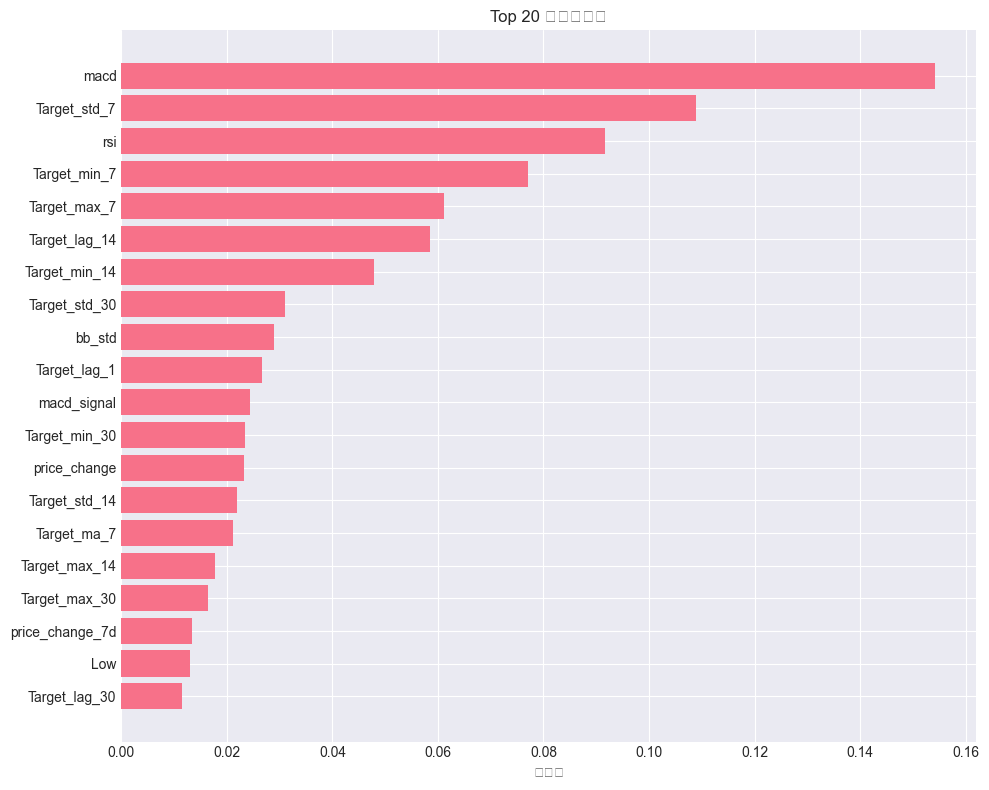

In [25]:
# 特征重要性分析
importance_df = xgb_predictor.get_feature_importance(top_n=20)

# 可视化特征重要性
plt.figure(figsize=(10, 8))
plt.barh(range(20), importance_df.head(20)['importance'])
plt.yticks(range(20), importance_df.head(20)['feature'])
plt.xlabel('重要性')
plt.title('Top 20 特征重要性')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [27]:
# 训练集成模型
ensemble = EnsemblePredictor(model_types=['xgboost', 'lightgbm', 'random_forest'])
ensemble.train(X_train, y_train, X_val, y_val)


🎯 训练集成模型...

训练模型 1/3: xgboost

🚀 开始训练 xgboost 模型...
训练集大小: (363787, 37)
✅ 模型训练完成
✅ 模型训练完成

📊 训练集 评估结果:
  RMSE: 0.0004
  MAE:  0.0003
  R²:   0.9951

📊 验证集 评估结果:
  RMSE: 0.0014
  MAE:  0.0003
  R²:   0.9364

训练模型 2/3: lightgbm

🚀 开始训练 lightgbm 模型...
训练集大小: (363787, 37)

📊 训练集 评估结果:
  RMSE: 0.0004
  MAE:  0.0003
  R²:   0.9951

📊 验证集 评估结果:
  RMSE: 0.0014
  MAE:  0.0003
  R²:   0.9364

训练模型 2/3: lightgbm

🚀 开始训练 lightgbm 模型...
训练集大小: (363787, 37)


TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'verbose'

In [28]:
# 评估集成模型
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ensemble_pred = ensemble.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, ensemble_pred))
mae = mean_absolute_error(y_val, ensemble_pred)
r2 = r2_score(y_val, ensemble_pred)

print(f"集成模型验证集评估:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  R²:   {r2:.4f}")

TypeError: 'NoneType' object is not iterable

## 5. 预测可视化

In [29]:
# 实际值 vs 预测值
plt.figure(figsize=(10, 6))
plt.scatter(y_val, ensemble_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('实际值 vs 预测值')
plt.tight_layout()
plt.show()

NameError: name 'ensemble_pred' is not defined

<Figure size 1000x600 with 0 Axes>

In [30]:
# 残差分析
residuals = y_val - ensemble_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 残差分布
axes[0].hist(residuals, bins=50, edgecolor='black')
axes[0].set_title('残差分布')
axes[0].set_xlabel('残差')
axes[0].set_ylabel('频数')

# 残差 vs 预测值
axes[1].scatter(ensemble_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('残差 vs 预测值')
axes[1].set_xlabel('预测值')
axes[1].set_ylabel('残差')

plt.tight_layout()
plt.show()

NameError: name 'ensemble_pred' is not defined

## 6. 生成提交文件

In [31]:
# 在测试集上预测
# 确保测试集的特征与训练集一致
test_features = [col for col in train_df_featured.columns if col in test_df_featured.columns and col != 'Target']

# 只保留训练集中用到的特征
X_test = test_df_featured[test_features]

# 清理测试集数据
print("清理测试集数据...")
print(f"无穷大值数量: {np.isinf(X_test).sum().sum()}")
print(f"NaN值数量: {np.isnan(X_test).sum().sum()}")

# 替换无穷大值为NaN
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# 用训练集的均值填充（避免数据泄露）
for col in X_test.columns:
    if col in X.columns:
        X_test[col] = X_test[col].fillna(X[col].mean())
    else:
        X_test[col] = X_test[col].fillna(0)

# 最后的安全检查
X_test = X_test.fillna(0)

print(f"清理后 - 无穷大值: {np.isinf(X_test).sum().sum()}, NaN值: {np.isnan(X_test).sum().sum()}")

# 确保特征顺序一致
X_test = X_test[X_train.columns]

test_predictions = ensemble.predict(X_test)

print(f"\n测试集预测数量: {len(test_predictions)}")
print(f"预测值范围: [{test_predictions.min():.6f}, {test_predictions.max():.6f}]")
print(f"预测值均值: {test_predictions.mean():.6f}")
print(f"预测值标准差: {test_predictions.std():.6f}")

清理测试集数据...
无穷大值数量: 0
NaN值数量: 0
清理后 - 无穷大值: 0, NaN值: 0


KeyError: "['Target_lag_1', 'Target_lag_2', 'Target_lag_3', 'Target_lag_7', 'Target_lag_14', 'Target_lag_30', 'Target_ma_7', 'Target_std_7', 'Target_max_7', 'Target_min_7', 'Target_ma_14', 'Target_std_14', 'Target_max_14', 'Target_min_14', 'Target_ma_30', 'Target_std_30', 'Target_max_30', 'Target_min_30'] not in index"

In [ ]:
# 创建提交文件
# 使用原始测试集的Timestamp作为ID
submission_df = pd.DataFrame({
    'Timestamp': test_df['Timestamp'].values[:len(test_predictions)],
    'Prediction': test_predictions
})

# 保存
submission_file = "../submissions/submission.csv"
Path(submission_file).parent.mkdir(exist_ok=True)
submission_df.to_csv(submission_file, index=False)

print(f"✅ 提交文件已保存: {submission_file}")
print(f"\n提交文件形状: {submission_df.shape}")
print("\n提交文件预览:")
display(submission_df.head(10))
print("\n提交文件统计:")
print(submission_df['Prediction'].describe())

In [ ]:
# 保存模型
ensemble.save_models("../models")
print("✅ 模型已保存")

## 完成！

下一步：将 `submissions/submission.csv` 上传到 Kaggle 比赛页面